In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [4]:
df=pd.read_csv('my_movies.csv')
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [6]:
df=df.iloc[:,5:]
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


# Apriori Algorithm

In [8]:
# Assosiation rule with 10% support and 30% confidence

In [9]:
freq=apriori(df,min_support=0.1,use_colnames=True)
freq

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [11]:
rules=association_rules(freq,metric='lift',min_threshold=0.30)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
...,...,...,...,...,...,...,...,...,...,...
245,(LOTR2),"(Sixth Sense, LOTR1, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
246,(Green Mile),"(Sixth Sense, LOTR2, LOTR1, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
247,(Harry Potter1),"(Sixth Sense, LOTR2, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
248,(Sixth Sense),"(LOTR2, LOTR1, Green Mile, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000


In [12]:
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
...,...,...,...,...,...,...,...,...,...,...
245,(LOTR2),"(Sixth Sense, LOTR1, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
246,(Green Mile),"(Sixth Sense, LOTR2, LOTR1, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
247,(Harry Potter1),"(Sixth Sense, LOTR2, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
248,(Sixth Sense),"(LOTR2, LOTR1, Green Mile, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000


Text(0.5, 1.0, 'Support vs Confidence')

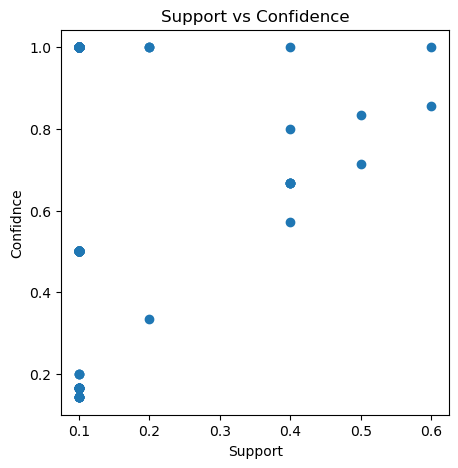

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidnce')
plt.title('Support vs Confidence')

In [14]:
matrix = lift.pivot('antecedents','consequents','lift')
matrix

C:\Users\my computer\AppData\Local\Temp\ipykernel_10740\3545437843.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix = lift.pivot('antecedents','consequents','lift')


consequents,(Gladiator),"(Green Mile, LOTR)","(Braveheart, Patriot)","(Gladiator, Braveheart)","(LOTR2, LOTR1)","(Gladiator, Green Mile, LOTR)",(Harry Potter1),"(Sixth Sense, Green Mile, LOTR)","(Sixth Sense, Gladiator, Green Mile)","(Sixth Sense, Gladiator, LOTR)","(LOTR2, LOTR1, Harry Potter1)","(Sixth Sense, LOTR1, Harry Potter1)","(Sixth Sense, LOTR2, Harry Potter1)","(Sixth Sense, LOTR2, LOTR1)",(Green Mile),"(Sixth Sense, LOTR1, Green Mile)","(LOTR2, LOTR1, Green Mile)","(Sixth Sense, LOTR2, Green Mile)","(Sixth Sense, LOTR2, LOTR1, Harry Potter1)","(LOTR2, Green Mile)","(Sixth Sense, LOTR2, LOTR1, Green Mile)","(LOTR2, Harry Potter1)","(Green Mile, Harry Potter1)","(LOTR2, LOTR1, Green Mile, Harry Potter1)",(Sixth Sense),(Patriot),"(Sixth Sense, LOTR1, Green Mile, Harry Potter1)","(LOTR2, Green Mile, Harry Potter1)",(LOTR),(Braveheart),(LOTR1),"(Sixth Sense, Green Mile, Harry Potter1)","(LOTR1, Green Mile, Harry Potter1)",(LOTR2),"(Sixth Sense, Green Mile)",(Harry Potter2),"(Sixth Sense, Patriot)","(Sixth Sense, Gladiator)","(Gladiator, LOTR)","(Sixth Sense, LOTR)","(Gladiator, Green Mile)","(LOTR1, Harry Potter1)","(Sixth Sense, Harry Potter1)","(Sixth Sense, LOTR1)","(Sixth Sense, LOTR2)","(LOTR1, Green Mile)","(Gladiator, Patriot)","(Sixth Sense, LOTR2, Green Mile, Harry Potter1)"
antecedents,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
(Sixth Sense),1.190476,1.666667,NaN,NaN,NaN,1.666667,NaN,NaN,NaN,NaN,1.666667,NaN,NaN,NaN,1.666667,NaN,1.666667,NaN,NaN,1.666667,NaN,1.666667,1.666667,1.666667,NaN,1.111111,NaN,1.666667,1.666667,NaN,NaN,NaN,1.666667,NaN,NaN,NaN,NaN,NaN,1.666667,NaN,1.666667,1.666667,NaN,NaN,NaN,1.666667,1.111111,NaN
"(LOTR2, Green Mile)",NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.666667,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,10.0,10.0,NaN,NaN,NaN,NaN
"(Green Mile, LOTR)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Braveheart)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Braveheart, Patriot)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(LOTR2, LOTR1)",NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
"(Sixth Sense, Gladiator, LOTR)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Sixth Sense, Gladiator, Green Mile)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Sixth Sense, Green Mile, LOTR)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='consequents', ylabel='antecedents'>

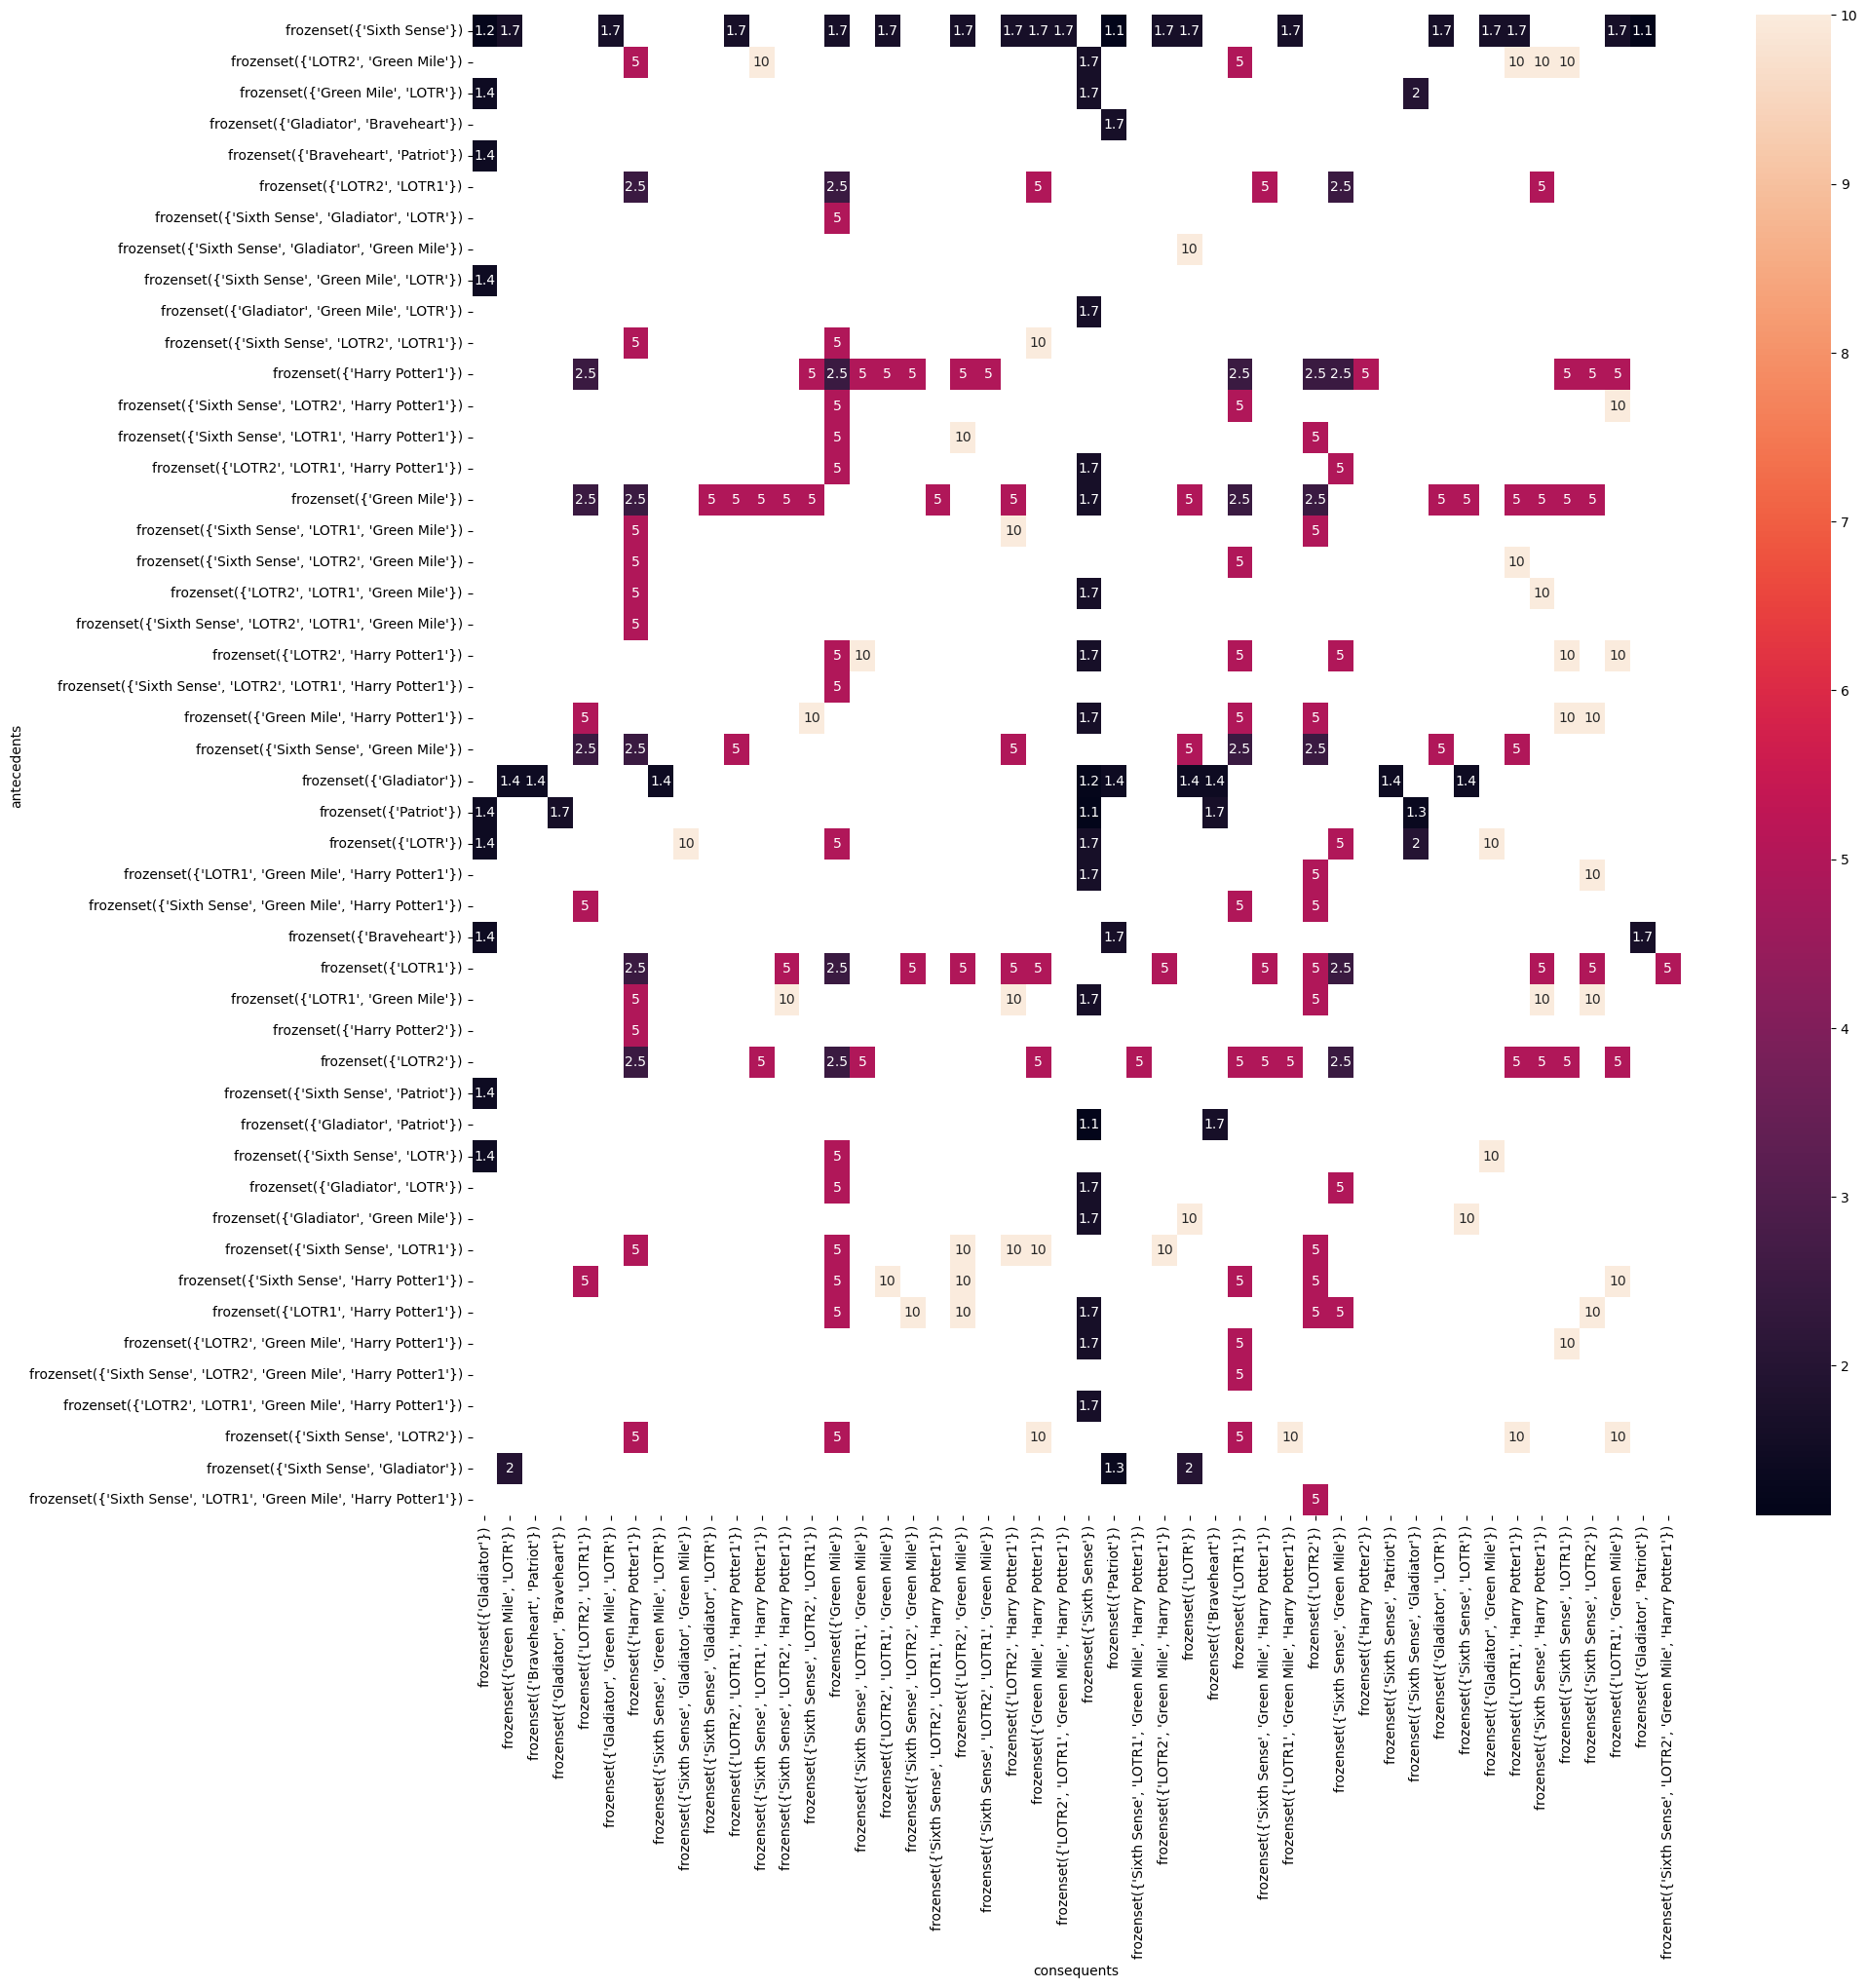

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(matrix,annot=True)

<Axes: xlabel='support', ylabel='confidence'>

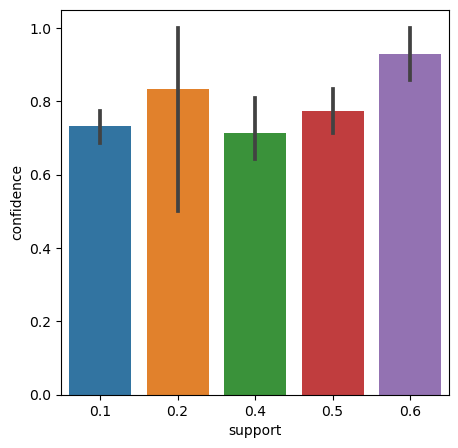

In [21]:
plt.figure(figsize=(5,5))
sns.barplot(x='support',y='confidence',data=lift)


Text(0.5, 1.0, 'Lift vs Confidence')

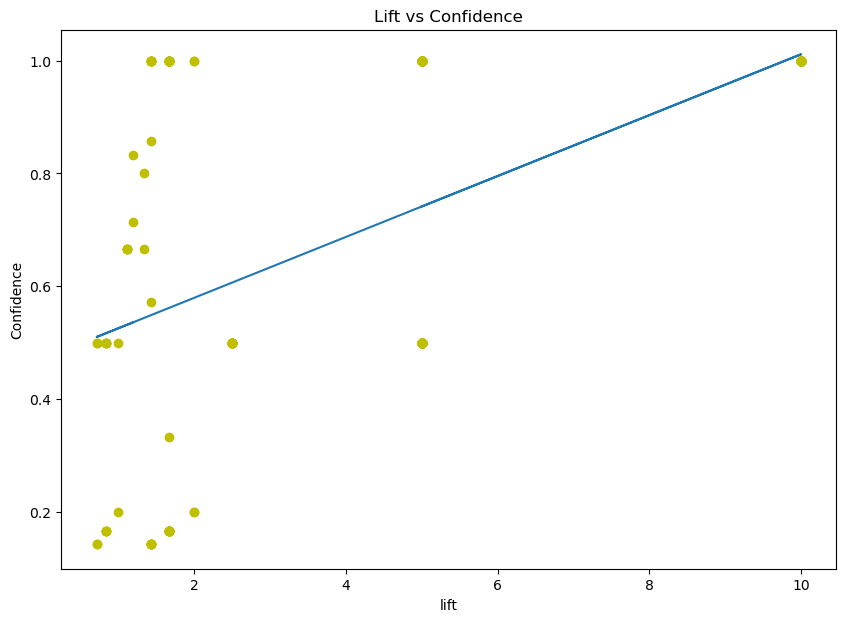

In [25]:
plt.figure(figsize=(10,7))
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')

In [26]:
# Assosiation rule with 10% support and 70% confidence

In [40]:
freq1=apriori(df,min_support=0.1,use_colnames=True)
freq1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [41]:
rules1=association_rules(freq1,metric='lift',min_threshold=0.70)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
...,...,...,...,...,...,...,...,...,...,...
245,(LOTR2),"(Sixth Sense, LOTR1, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
246,(Green Mile),"(Sixth Sense, LOTR2, LOTR1, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
247,(Harry Potter1),"(Sixth Sense, LOTR2, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
248,(Sixth Sense),"(LOTR2, LOTR1, Green Mile, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000


In [42]:
lift1=rules1[rules1.lift>1]
lift1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
...,...,...,...,...,...,...,...,...,...,...
245,(LOTR2),"(Sixth Sense, LOTR1, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
246,(Green Mile),"(Sixth Sense, LOTR2, LOTR1, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
247,(Harry Potter1),"(Sixth Sense, LOTR2, LOTR1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
248,(Sixth Sense),"(LOTR2, LOTR1, Green Mile, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000


Text(0.5, 1.0, 'Support vs Confidence')

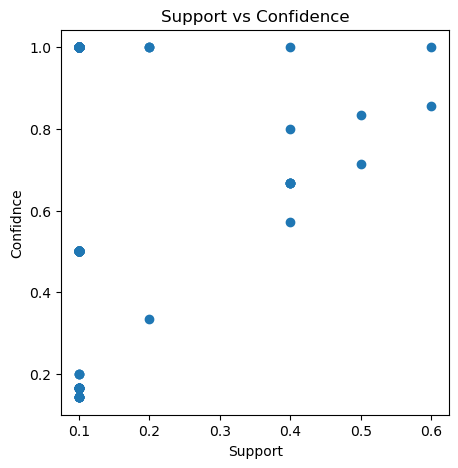

In [43]:
plt.figure(figsize=(5,5))
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidnce')
plt.title('Support vs Confidence')

In [44]:
matrix1 = lift1.pivot('antecedents','consequents','lift')
matrix1

C:\Users\my computer\AppData\Local\Temp\ipykernel_10740\2359612302.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix1 = lift1.pivot('antecedents','consequents','lift')


consequents,(Gladiator),"(Green Mile, LOTR)","(Braveheart, Patriot)","(Gladiator, Braveheart)","(LOTR2, LOTR1)","(Gladiator, Green Mile, LOTR)",(Harry Potter1),"(Sixth Sense, Green Mile, LOTR)","(Sixth Sense, Gladiator, Green Mile)","(Sixth Sense, Gladiator, LOTR)","(LOTR2, LOTR1, Harry Potter1)","(Sixth Sense, LOTR1, Harry Potter1)","(Sixth Sense, LOTR2, Harry Potter1)","(Sixth Sense, LOTR2, LOTR1)",(Green Mile),"(Sixth Sense, LOTR1, Green Mile)","(LOTR2, LOTR1, Green Mile)","(Sixth Sense, LOTR2, Green Mile)","(Sixth Sense, LOTR2, LOTR1, Harry Potter1)","(LOTR2, Green Mile)","(Sixth Sense, LOTR2, LOTR1, Green Mile)","(LOTR2, Harry Potter1)","(Green Mile, Harry Potter1)","(LOTR2, LOTR1, Green Mile, Harry Potter1)",(Sixth Sense),(Patriot),"(Sixth Sense, LOTR1, Green Mile, Harry Potter1)","(LOTR2, Green Mile, Harry Potter1)",(LOTR),(Braveheart),(LOTR1),"(Sixth Sense, Green Mile, Harry Potter1)","(LOTR1, Green Mile, Harry Potter1)",(LOTR2),"(Sixth Sense, Green Mile)",(Harry Potter2),"(Sixth Sense, Patriot)","(Sixth Sense, Gladiator)","(Gladiator, LOTR)","(Sixth Sense, LOTR)","(Gladiator, Green Mile)","(LOTR1, Harry Potter1)","(Sixth Sense, Harry Potter1)","(Sixth Sense, LOTR1)","(Sixth Sense, LOTR2)","(LOTR1, Green Mile)","(Gladiator, Patriot)","(Sixth Sense, LOTR2, Green Mile, Harry Potter1)"
antecedents,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
(Sixth Sense),1.190476,1.666667,NaN,NaN,NaN,1.666667,NaN,NaN,NaN,NaN,1.666667,NaN,NaN,NaN,1.666667,NaN,1.666667,NaN,NaN,1.666667,NaN,1.666667,1.666667,1.666667,NaN,1.111111,NaN,1.666667,1.666667,NaN,NaN,NaN,1.666667,NaN,NaN,NaN,NaN,NaN,1.666667,NaN,1.666667,1.666667,NaN,NaN,NaN,1.666667,1.111111,NaN
"(LOTR2, Green Mile)",NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.666667,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,10.0,10.0,NaN,NaN,NaN,NaN
"(Green Mile, LOTR)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Braveheart)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Braveheart, Patriot)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(LOTR2, LOTR1)",NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
"(Sixth Sense, Gladiator, LOTR)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Sixth Sense, Gladiator, Green Mile)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Sixth Sense, Green Mile, LOTR)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='consequents', ylabel='antecedents'>

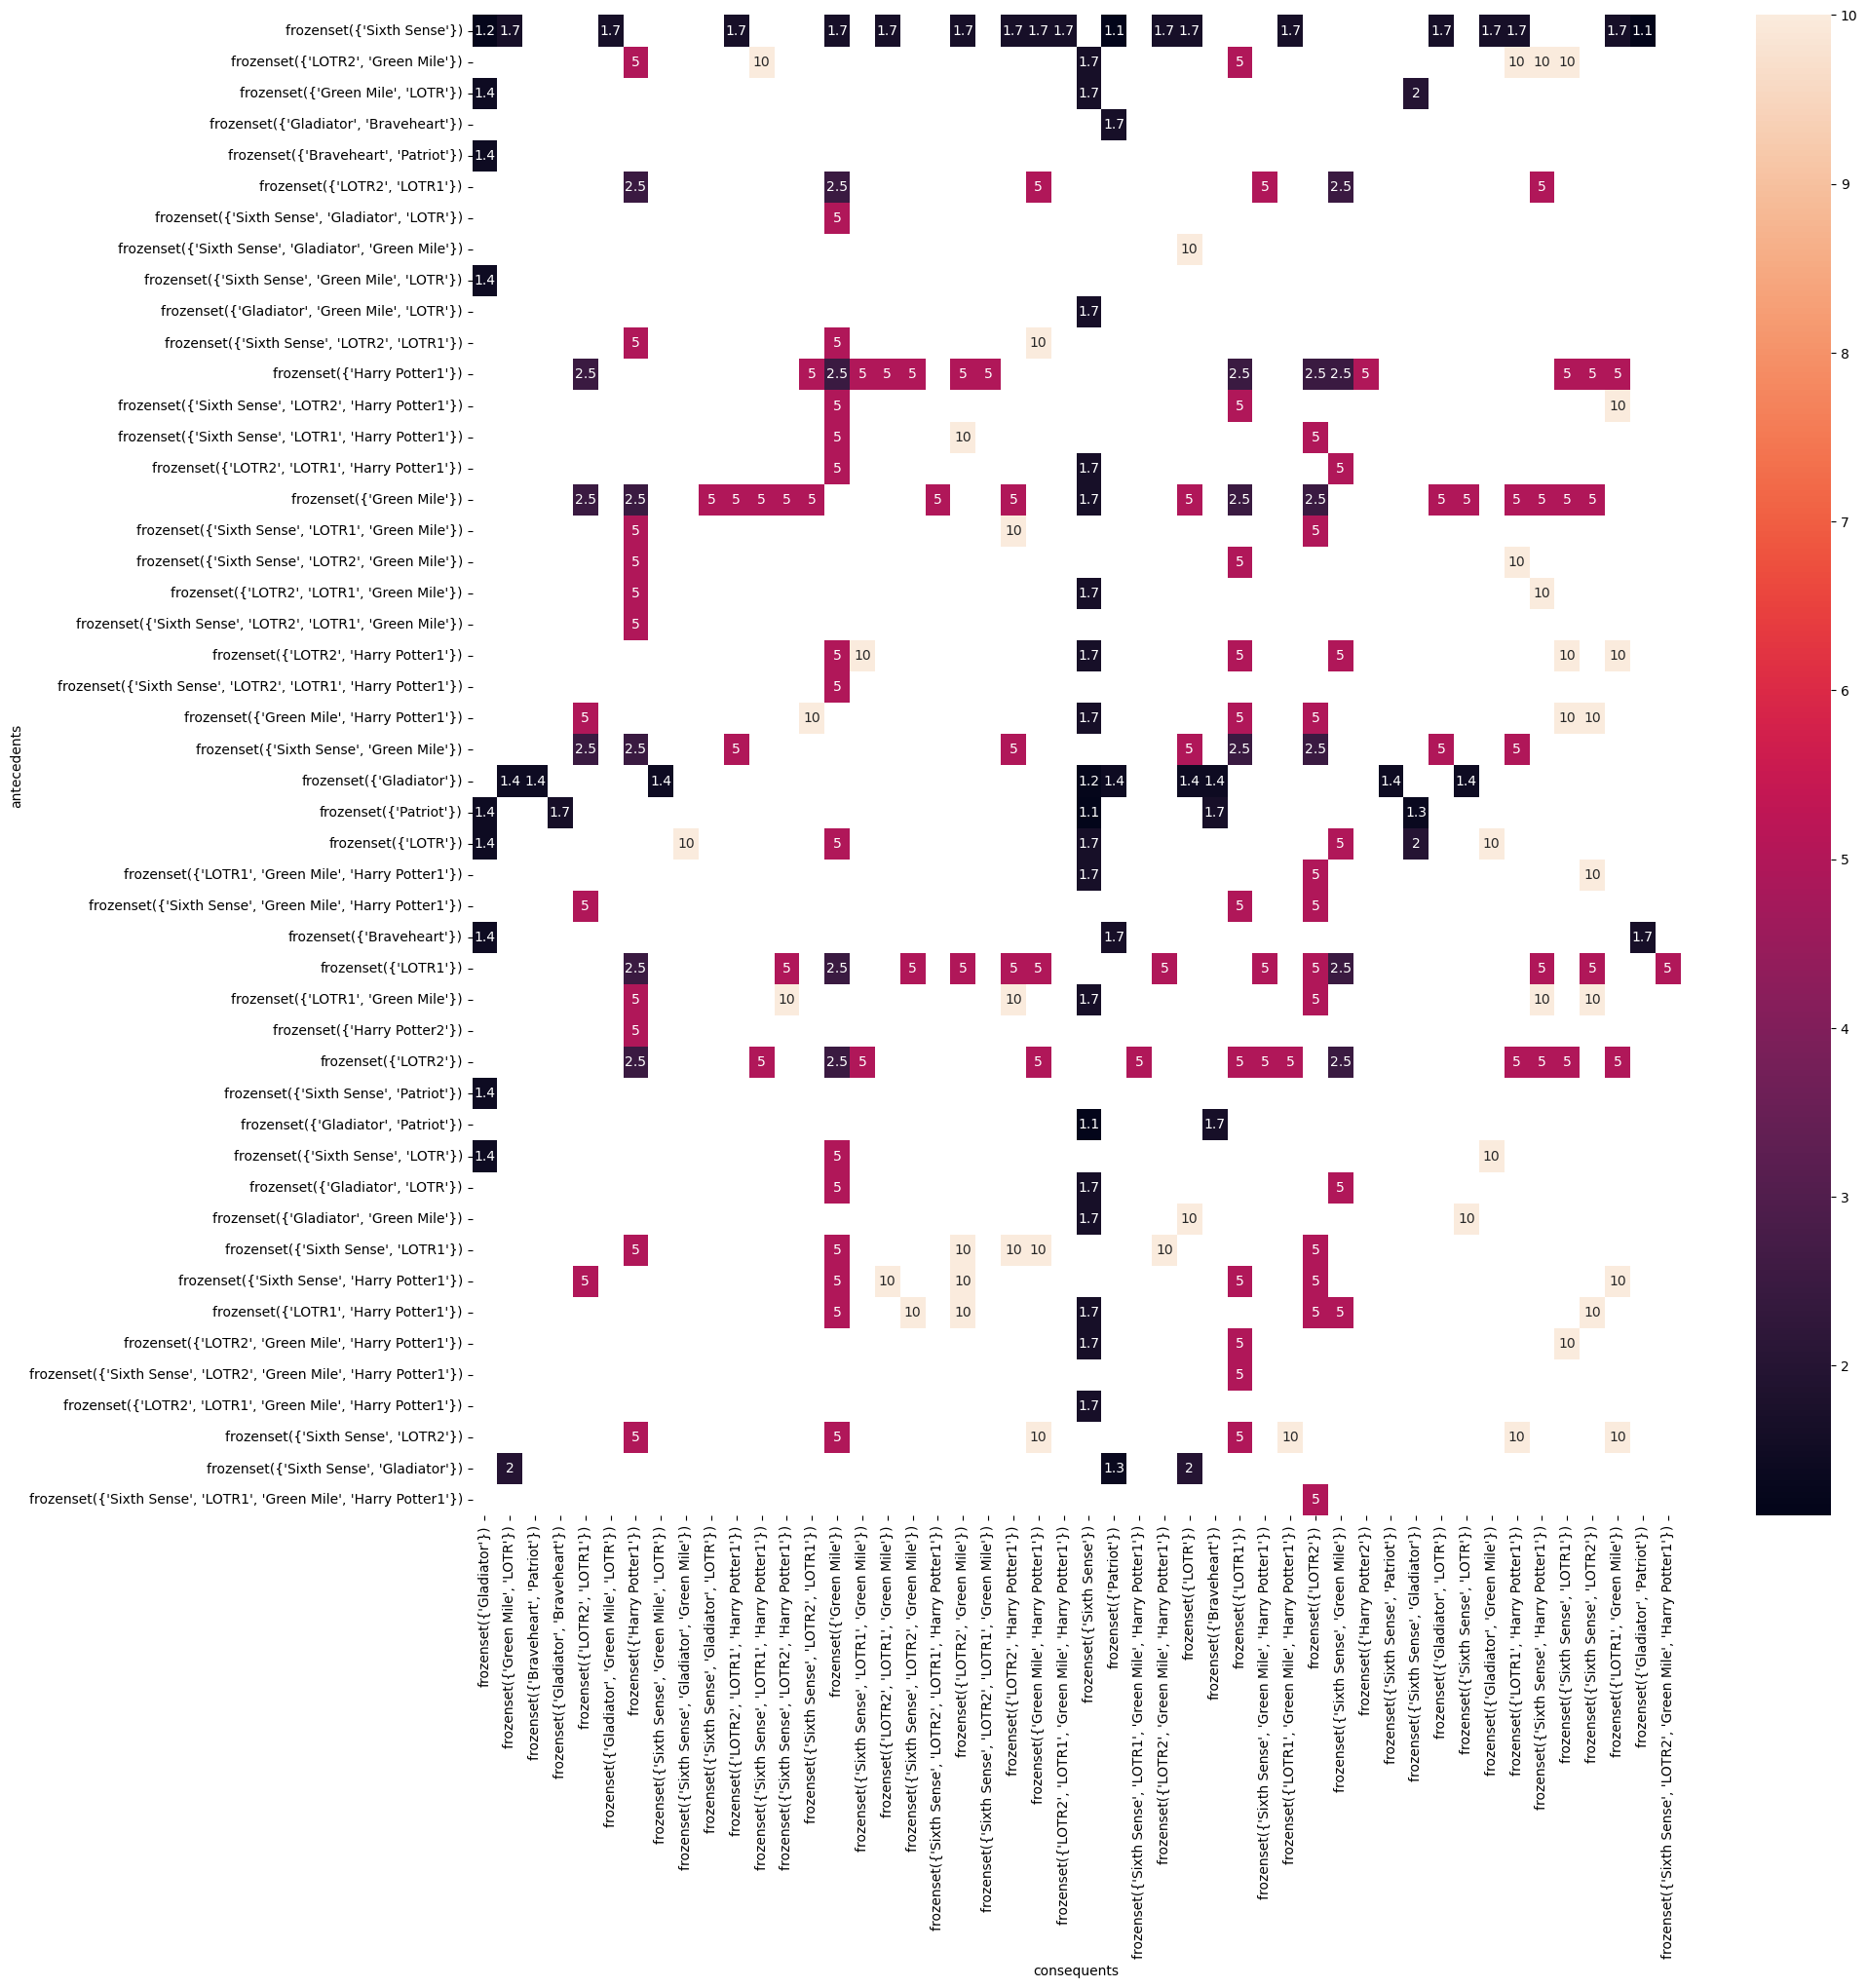

In [46]:
plt.figure(figsize=(20,20))
sns.heatmap(matrix1,annot=True)

<Axes: xlabel='support', ylabel='confidence'>

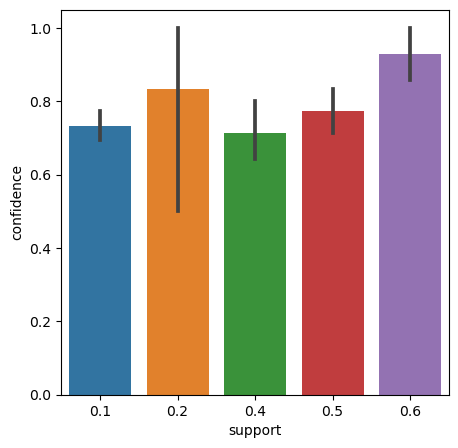

In [47]:
plt.figure(figsize=(5,5))
sns.barplot(x='support',y='confidence',data=lift1)

Text(0.5, 1.0, 'Lift vs Confidence')

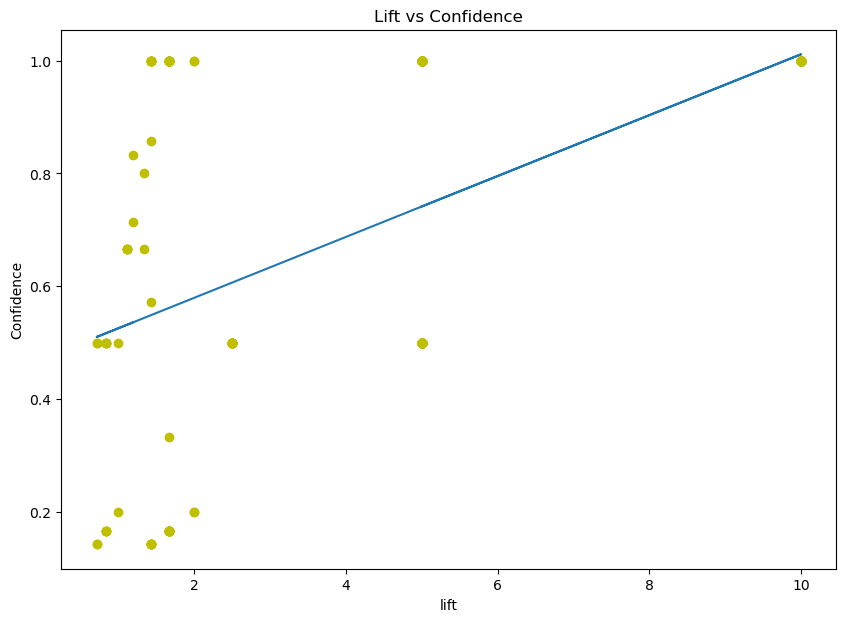

In [48]:
plt.figure(figsize=(10,7))
fit = np.polyfit(rules1['lift'], rules1['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules1['lift'], rules1['confidence'], 'yo', rules1['lift'], 
fit_fn(rules1['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')

In [49]:
# Assosiation rule with 15% support and 40% confidence

In [50]:
freq2=apriori(df,min_support=0.15,use_colnames=True)
freq2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Sixth Sense, Green Mile)"


In [51]:
rules2=association_rules(freq2,metric='lift',min_threshold=0.40)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000


In [52]:
lift2=rules2[rules2.lift>1]
lift2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000


Text(0.5, 1.0, 'Support vs Confidence')

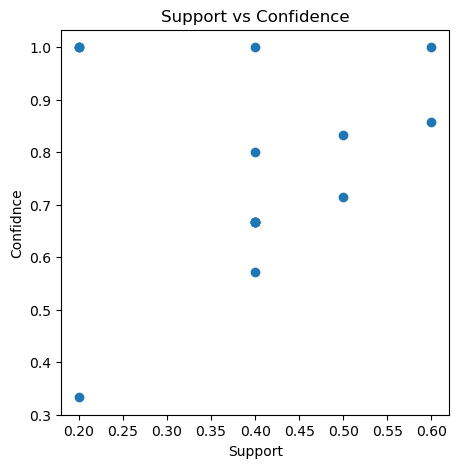

In [53]:
plt.figure(figsize=(5,5))
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidnce')
plt.title('Support vs Confidence')

In [54]:
matrix2 = lift2.pivot('antecedents','consequents','lift')
matrix2

C:\Users\my computer\AppData\Local\Temp\ipykernel_10740\695076964.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix2 = lift2.pivot('antecedents','consequents','lift')


consequents,(Gladiator),(Sixth Sense),(Patriot),(Green Mile),(LOTR1),(LOTR2),"(Gladiator, Patriot)","(Sixth Sense, Patriot)","(Sixth Sense, Gladiator)"
antecedents,,,,,,,,,
(Sixth Sense),1.190476,NaN,1.111111,1.666667,NaN,NaN,1.111111,NaN,NaN
(Gladiator),NaN,1.190476,1.428571,NaN,NaN,NaN,NaN,1.428571,NaN
(Patriot),1.428571,1.111111,NaN,NaN,NaN,NaN,NaN,NaN,1.333333
(Green Mile),NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(LOTR2),NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
(LOTR1),NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
"(Sixth Sense, Gladiator)",NaN,NaN,1.333333,NaN,NaN,NaN,NaN,NaN,NaN
"(Sixth Sense, Patriot)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Patriot)",NaN,1.111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='consequents', ylabel='antecedents'>

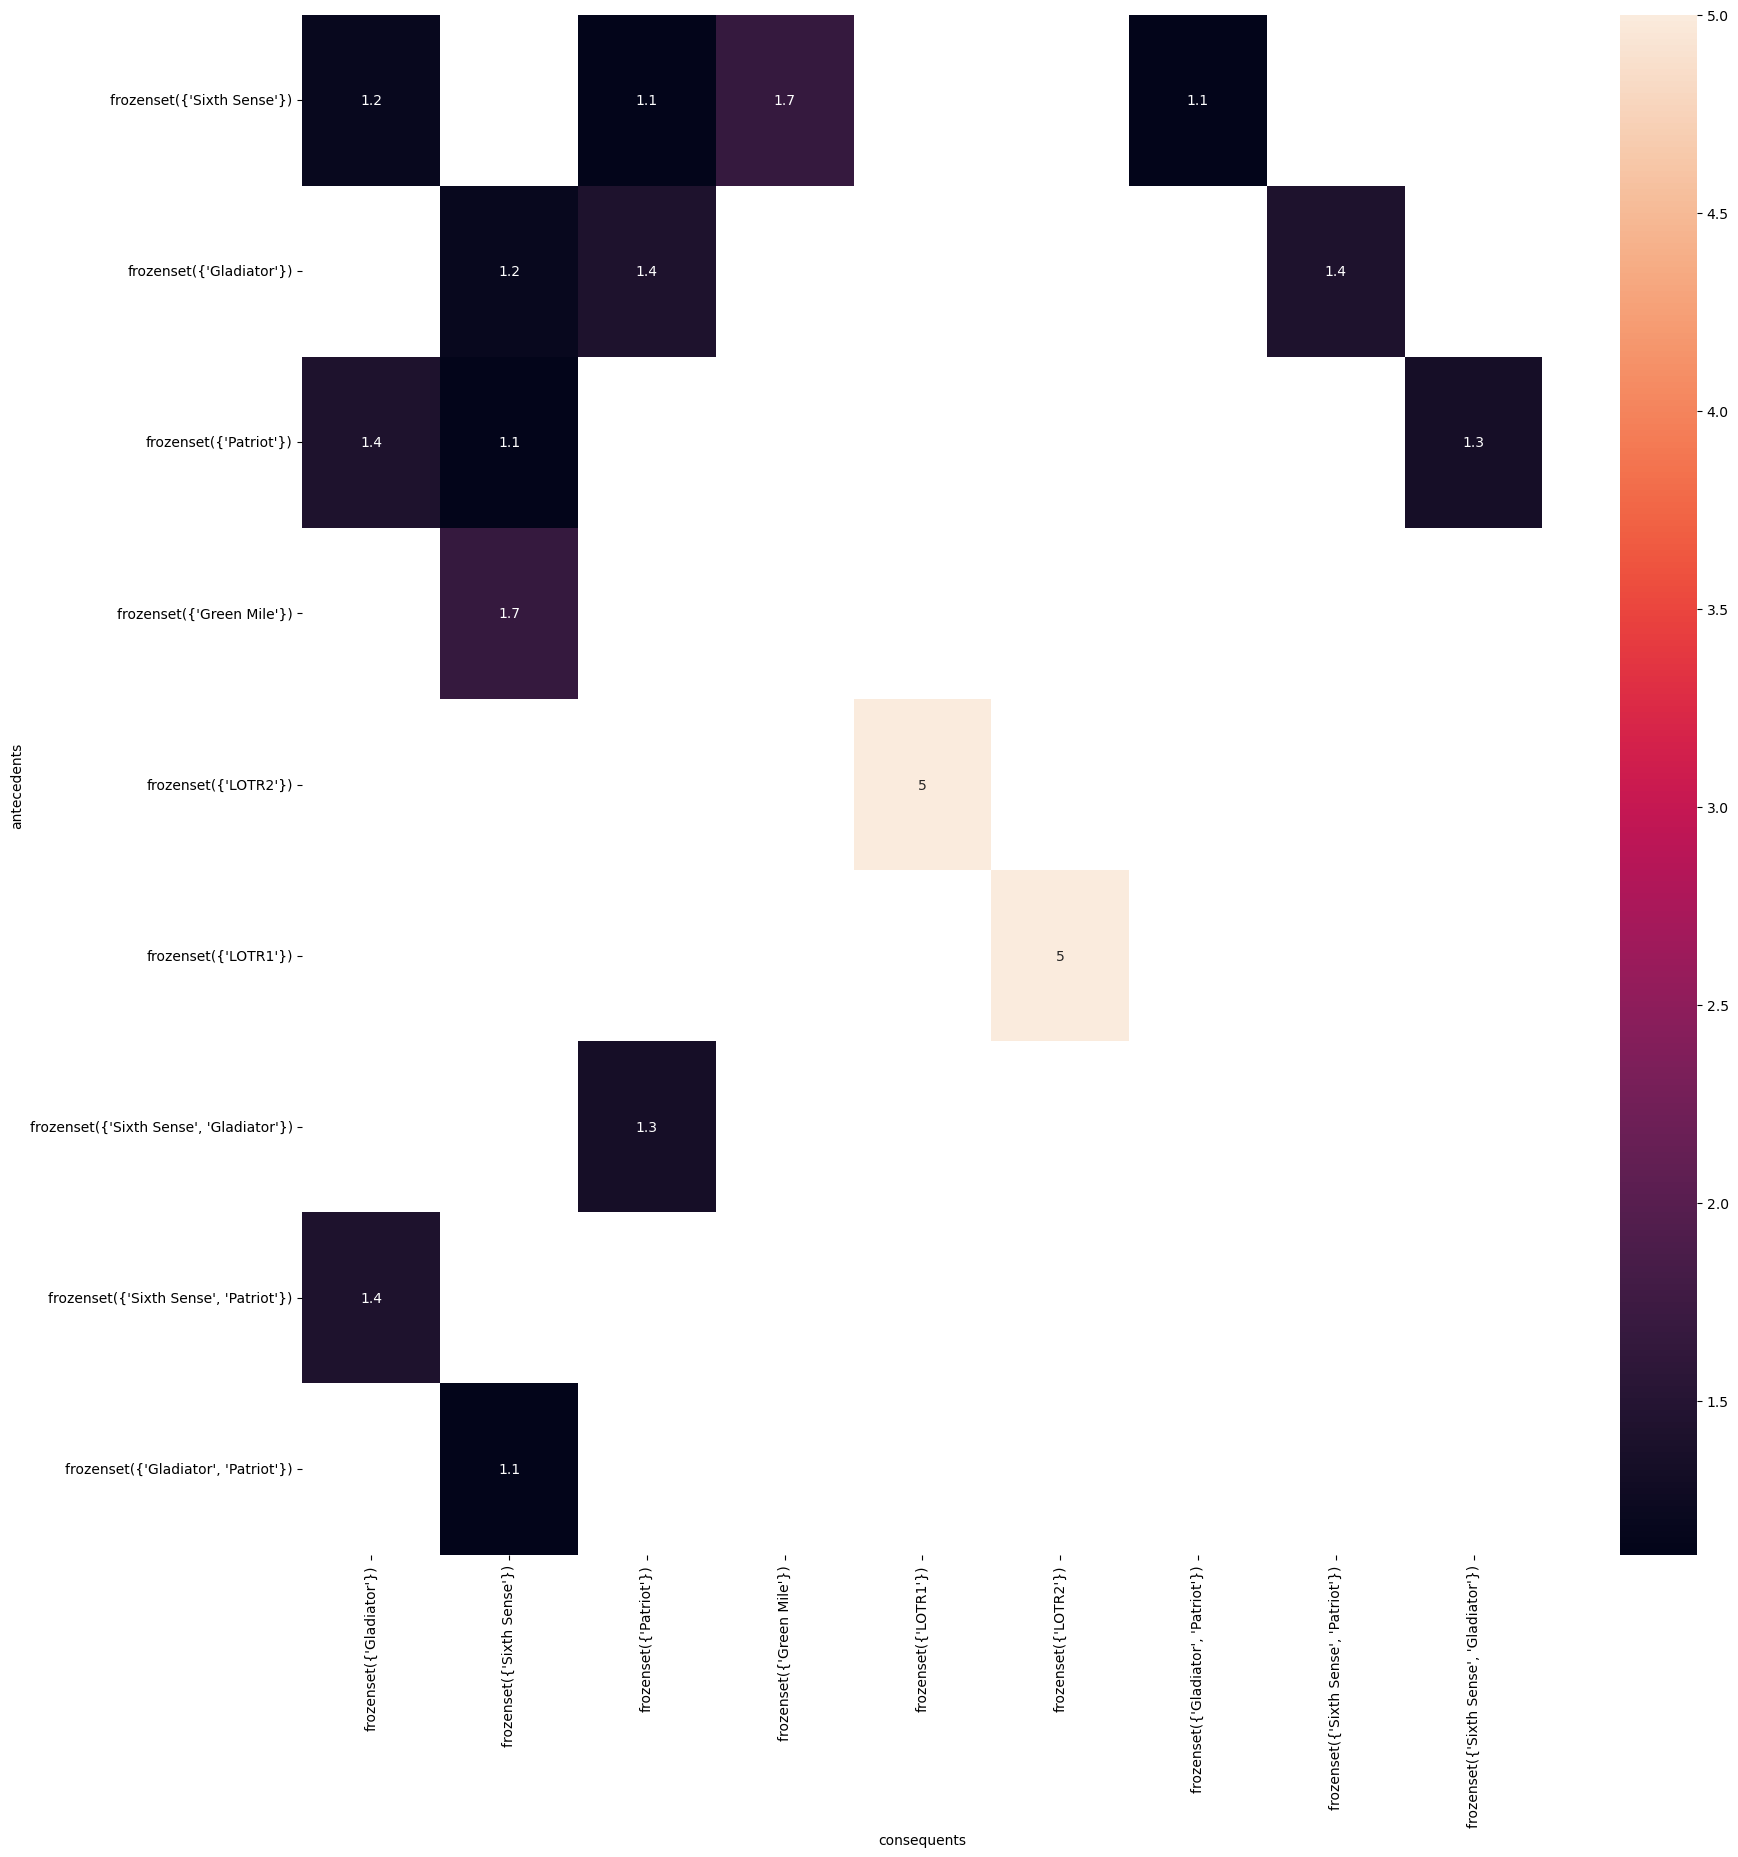

In [55]:
plt.figure(figsize=(20,20))
sns.heatmap(matrix2,annot=True)

<Axes: xlabel='support', ylabel='confidence'>

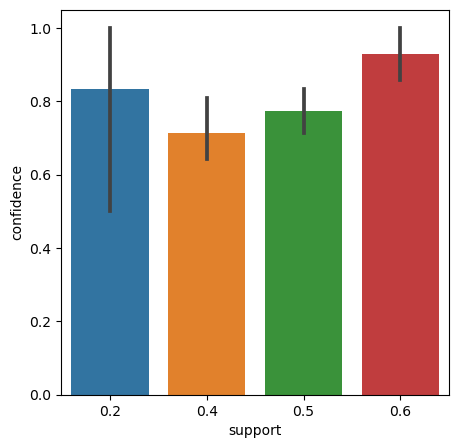

In [56]:
plt.figure(figsize=(5,5))
sns.barplot(x='support',y='confidence',data=lift2)

Text(0.5, 1.0, 'Lift vs Confidence')

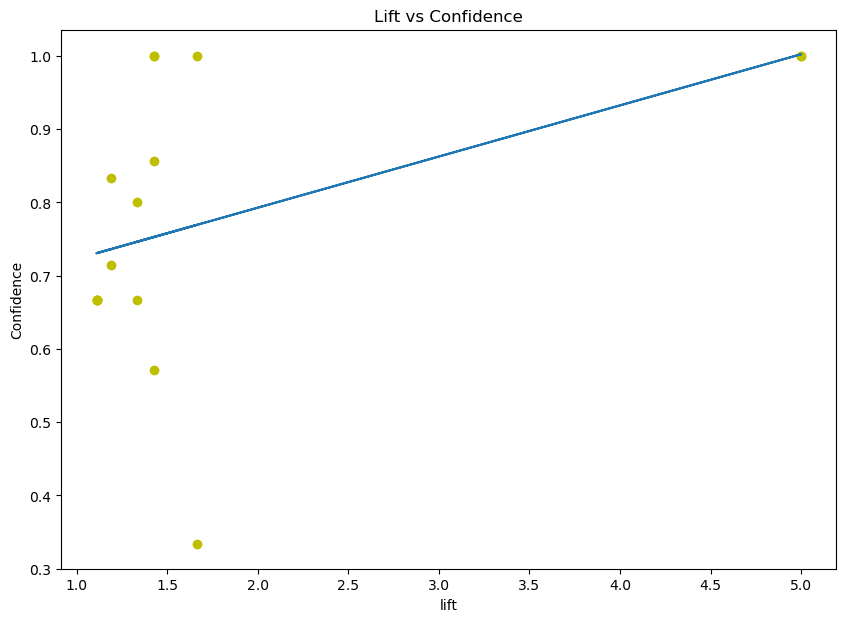

In [57]:
plt.figure(figsize=(10,7))
fit = np.polyfit(rules2['lift'], rules2['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules2['lift'], rules2['confidence'], 'yo', rules2['lift'], 
fit_fn(rules2['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')

In [58]:
# Assosiation rule with 20% support and 60% confidence

In [59]:
freq3=apriori(df,min_support=0.2,use_colnames=True)
freq3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Sixth Sense, Green Mile)"


In [60]:
rules3=association_rules(freq3,metric='lift',min_threshold=0.60)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000


In [61]:
lift3=rules3[rules3.lift>1]
lift3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000


Text(0.5, 1.0, 'Support vs Confidence')

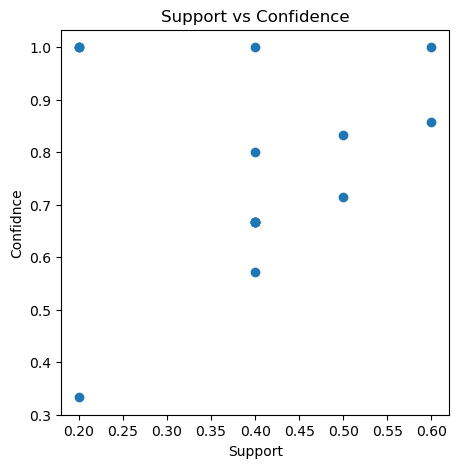

In [62]:
plt.figure(figsize=(5,5))
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidnce')
plt.title('Support vs Confidence')

In [63]:
matrix3 = lift3.pivot('antecedents','consequents','lift')
matrix3

C:\Users\my computer\AppData\Local\Temp\ipykernel_10740\470896395.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix3 = lift3.pivot('antecedents','consequents','lift')


consequents,(Gladiator),(Sixth Sense),(Patriot),(Green Mile),(LOTR1),(LOTR2),"(Gladiator, Patriot)","(Sixth Sense, Patriot)","(Sixth Sense, Gladiator)"
antecedents,,,,,,,,,
(Sixth Sense),1.190476,NaN,1.111111,1.666667,NaN,NaN,1.111111,NaN,NaN
(Gladiator),NaN,1.190476,1.428571,NaN,NaN,NaN,NaN,1.428571,NaN
(Patriot),1.428571,1.111111,NaN,NaN,NaN,NaN,NaN,NaN,1.333333
(Green Mile),NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(LOTR2),NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
(LOTR1),NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
"(Sixth Sense, Gladiator)",NaN,NaN,1.333333,NaN,NaN,NaN,NaN,NaN,NaN
"(Sixth Sense, Patriot)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Patriot)",NaN,1.111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='consequents', ylabel='antecedents'>

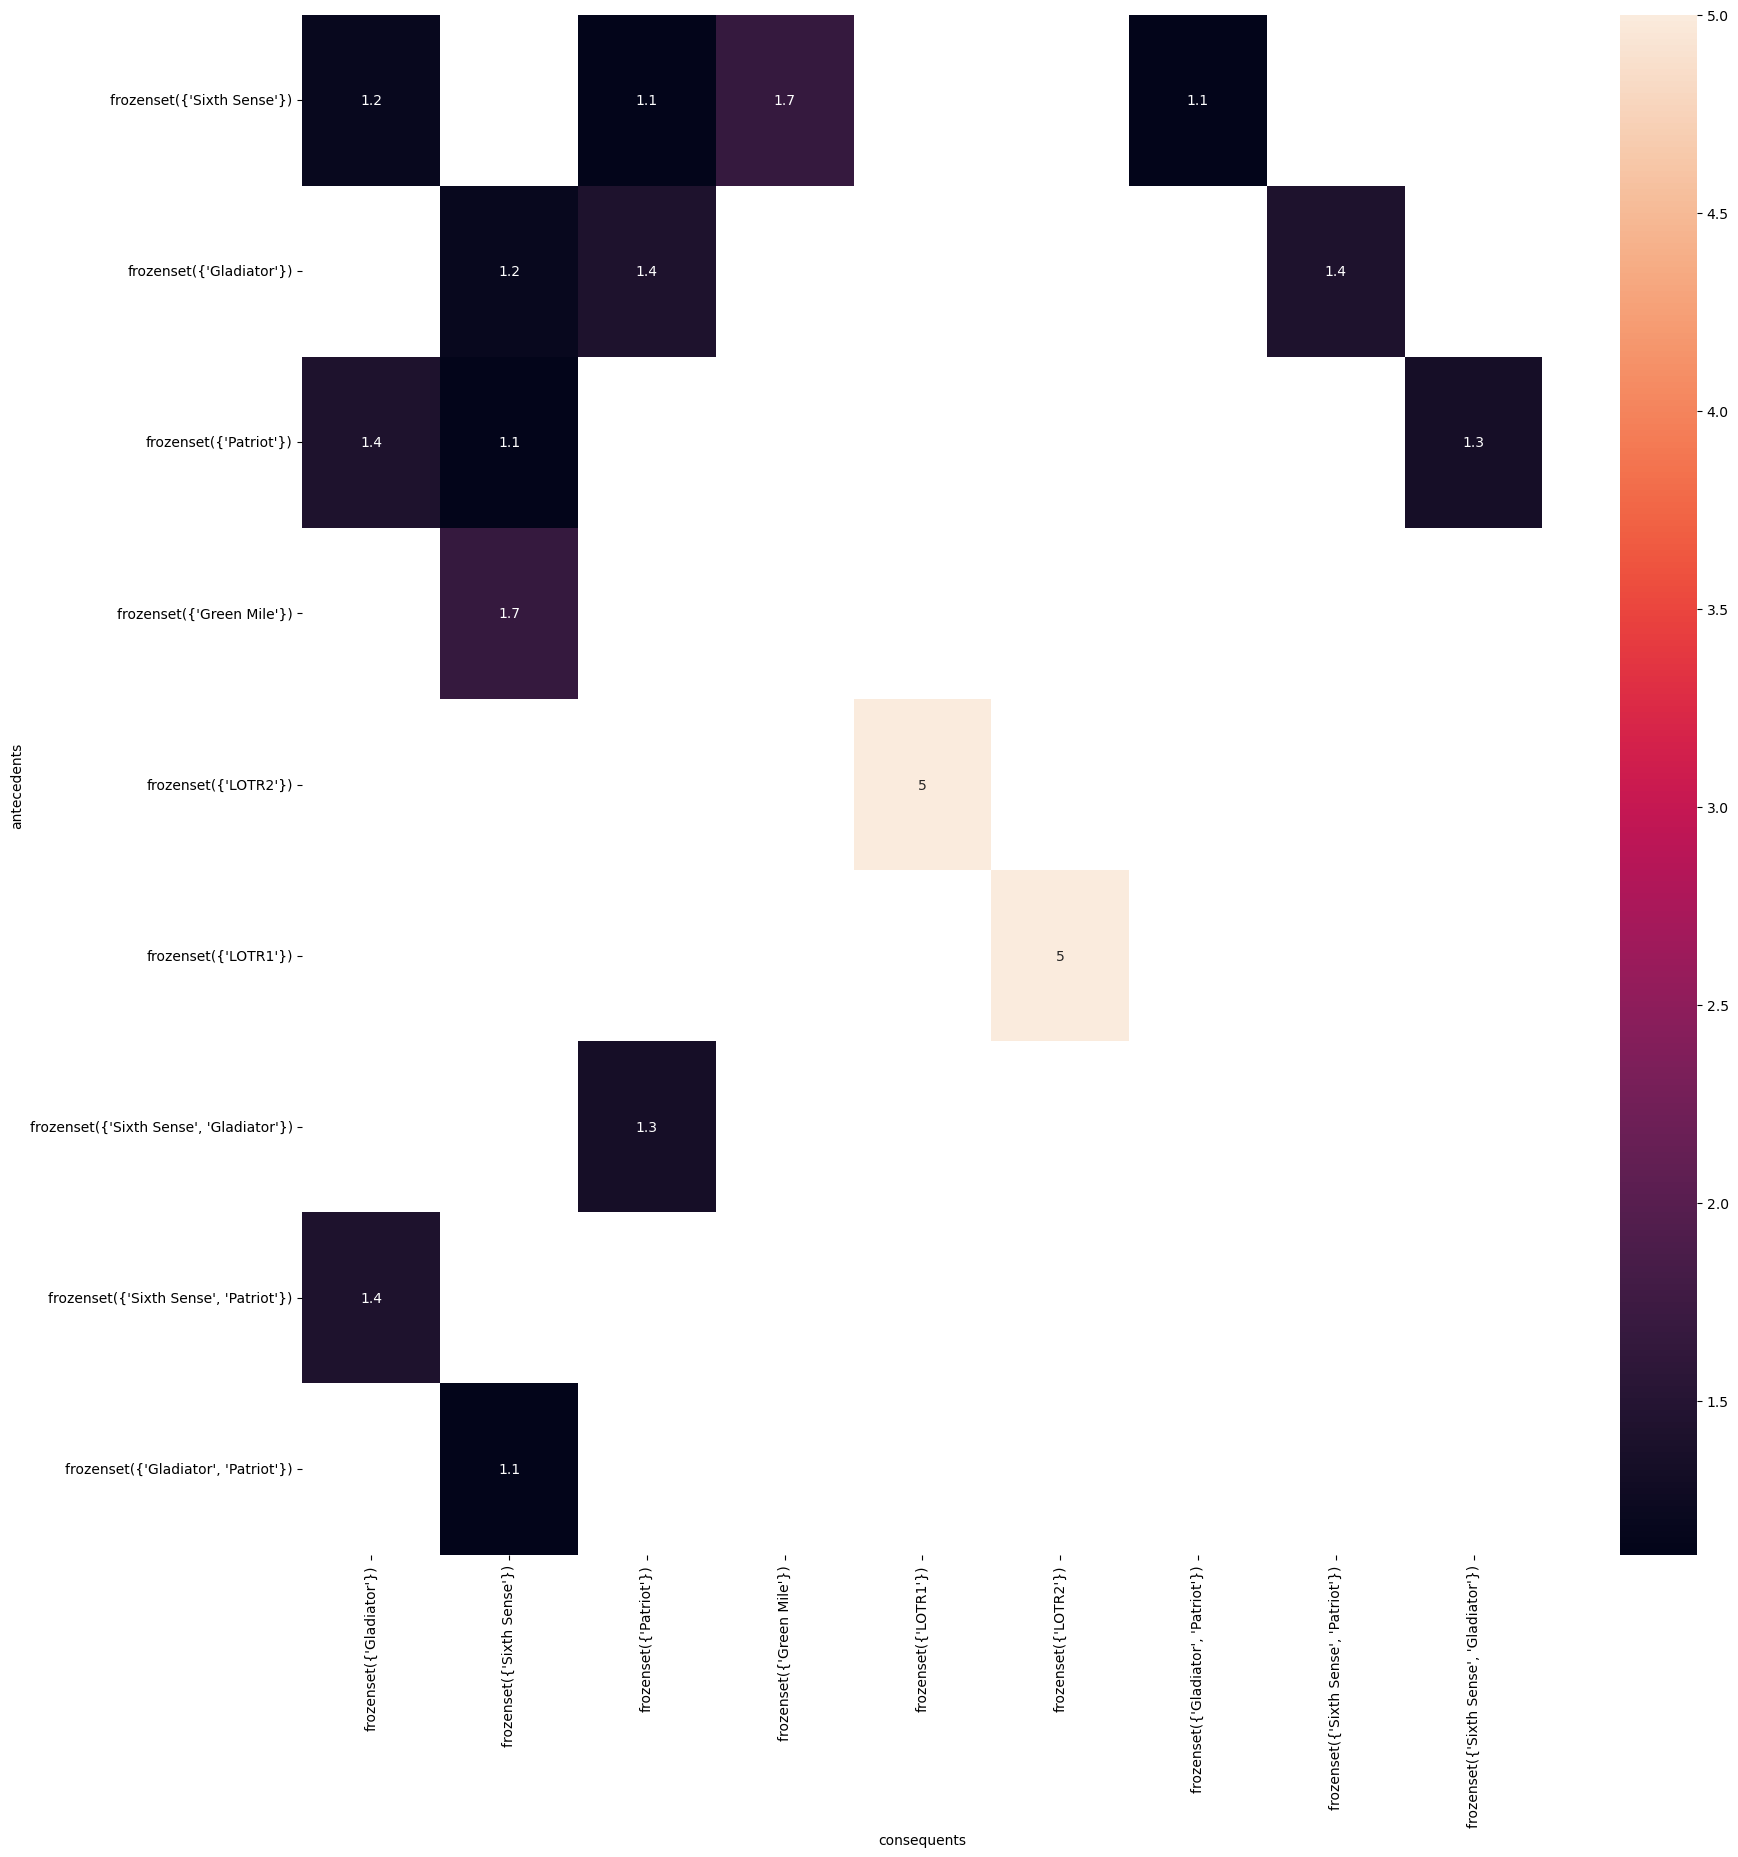

In [64]:
plt.figure(figsize=(20,20))
sns.heatmap(matrix3,annot=True)

<Axes: xlabel='support', ylabel='confidence'>

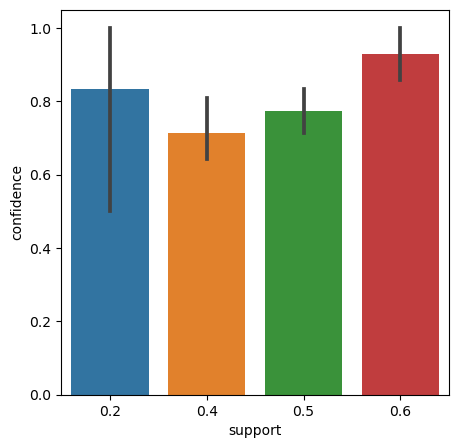

In [65]:
plt.figure(figsize=(5,5))
sns.barplot(x='support',y='confidence',data=lift3)

Text(0.5, 1.0, 'Lift vs Confidence')

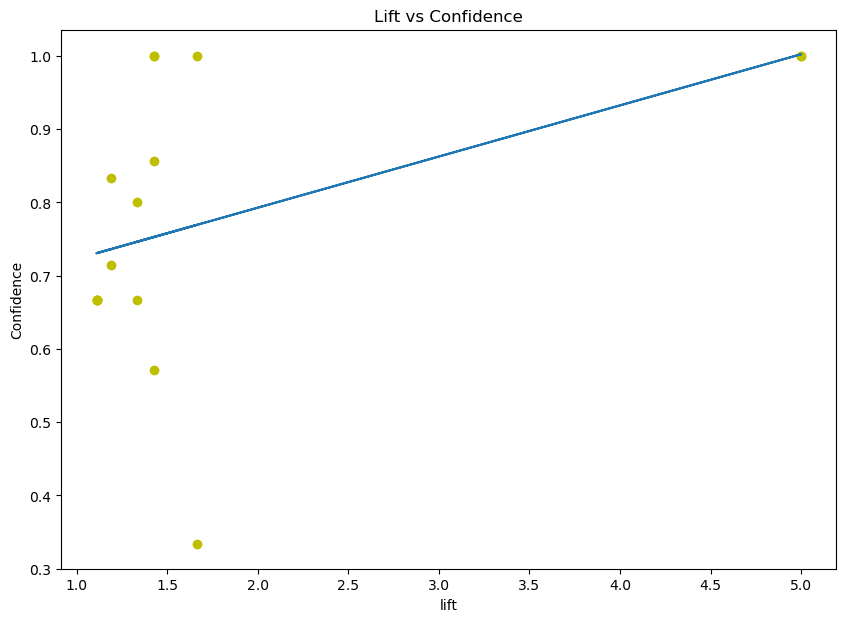

In [66]:
plt.figure(figsize=(10,7))
fit = np.polyfit(rules3['lift'], rules3['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules3['lift'], rules3['confidence'], 'yo', rules3['lift'], 
fit_fn(rules3['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')

In [77]:
# Assosiation rule with 50% support and 30% confidence

In [68]:
freq4=apriori(df,min_support=0.5,use_colnames=True)
freq4

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.6,"(Gladiator, Patriot)"


In [70]:
rules4=association_rules(freq4,metric='lift',min_threshold=0.30)
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000


In [71]:
lift4=rules4[rules4.lift>1]
lift4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000


Text(0.5, 1.0, 'Support vs Confidence')

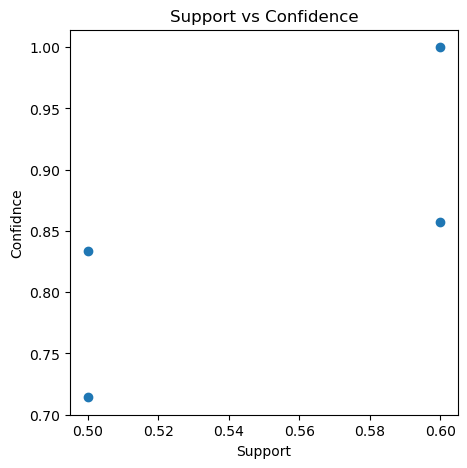

In [72]:
plt.figure(figsize=(5,5))
plt.scatter(rules4['support'],rules4['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidnce')
plt.title('Support vs Confidence')

In [73]:
matrix4 = lift4.pivot('antecedents','consequents','lift')
matrix4

C:\Users\my computer\AppData\Local\Temp\ipykernel_10740\1956251415.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  matrix4 = lift4.pivot('antecedents','consequents','lift')


consequents,(Gladiator),(Sixth Sense),(Patriot)
antecedents,,,
(Sixth Sense),1.190476,NaN,NaN
(Gladiator),NaN,1.190476,1.428571
(Patriot),1.428571,NaN,NaN


<Axes: xlabel='consequents', ylabel='antecedents'>

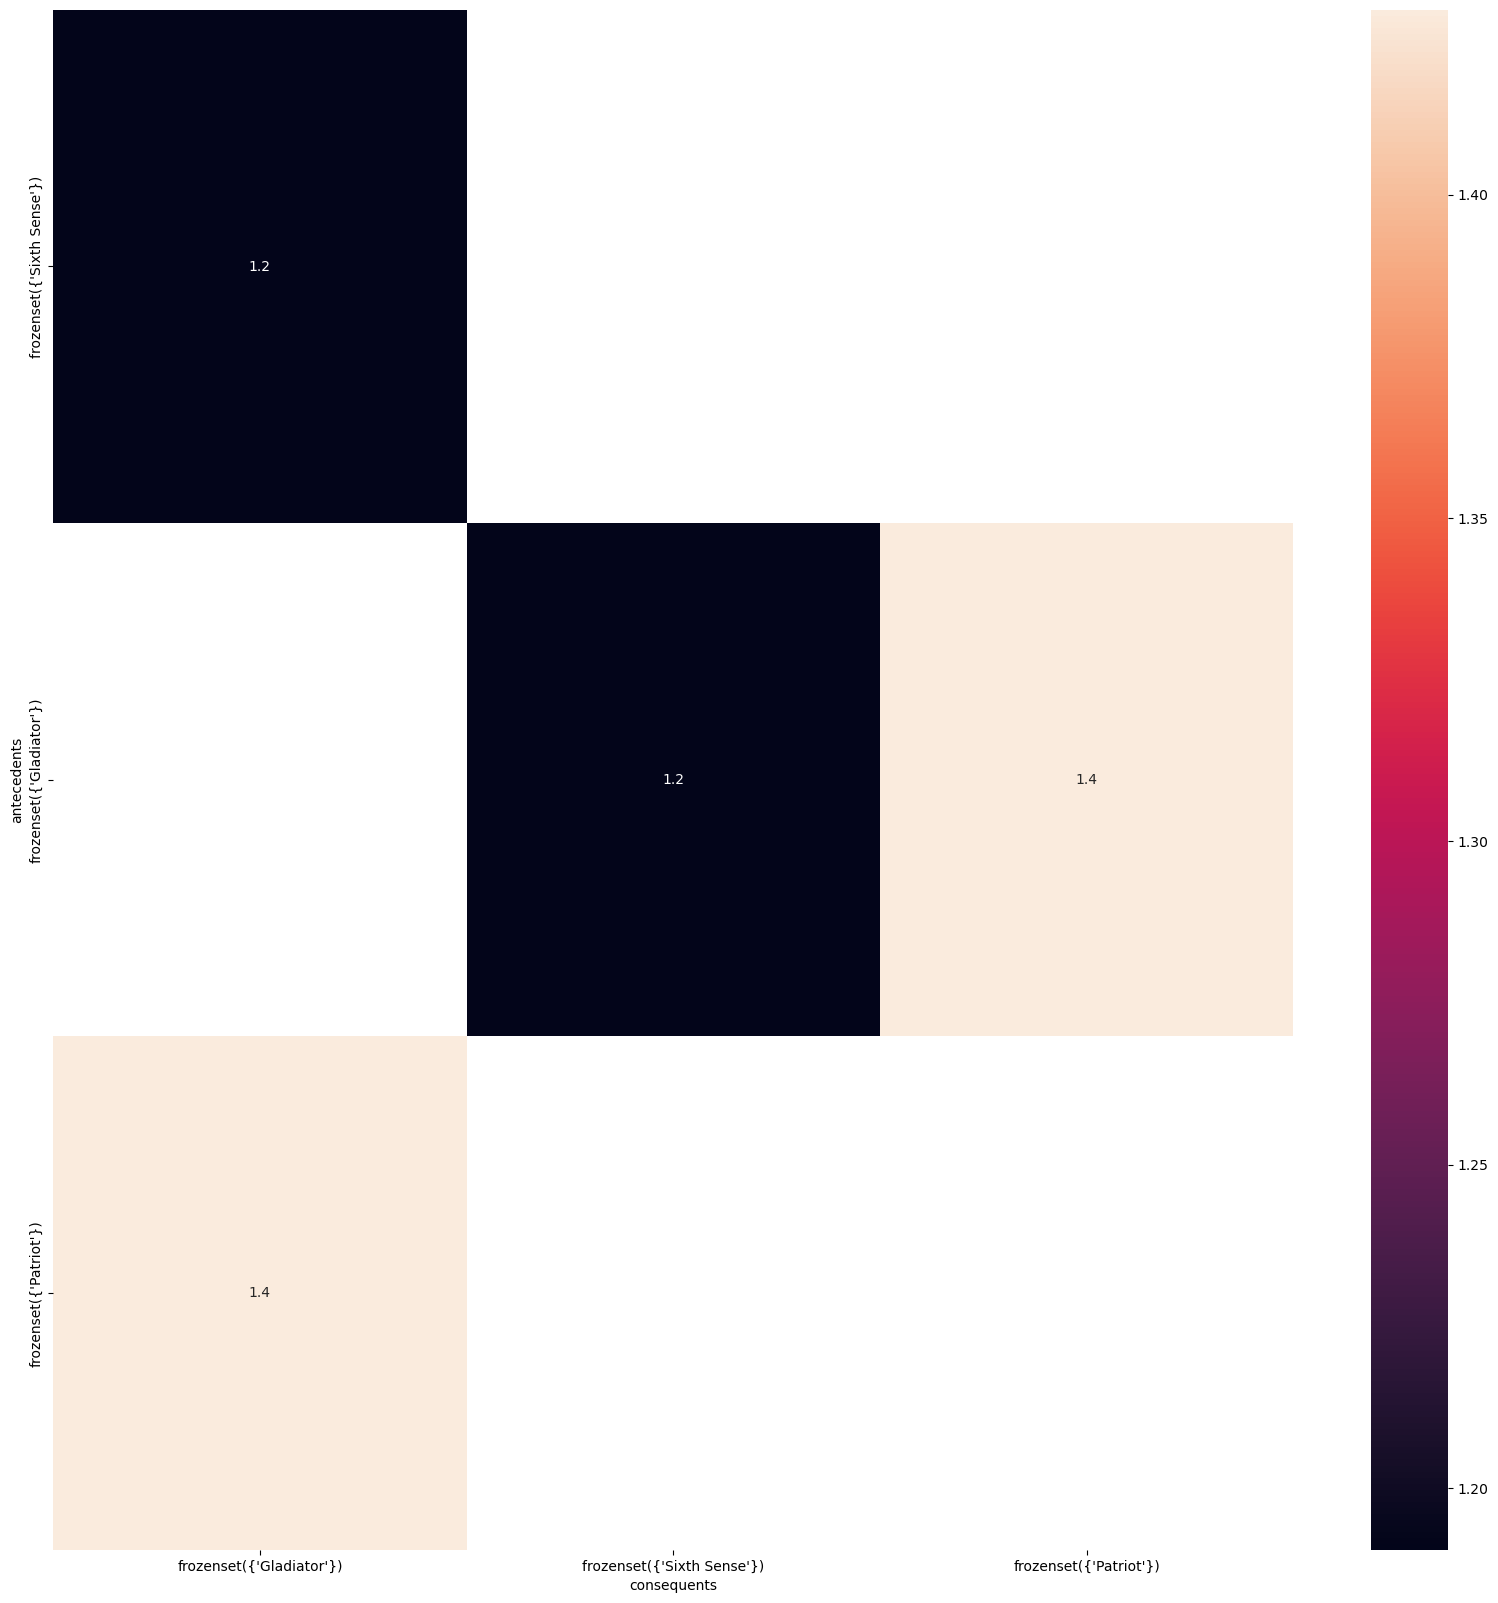

In [74]:
plt.figure(figsize=(20,20))
sns.heatmap(matrix4,annot=True)

<Axes: xlabel='support', ylabel='confidence'>

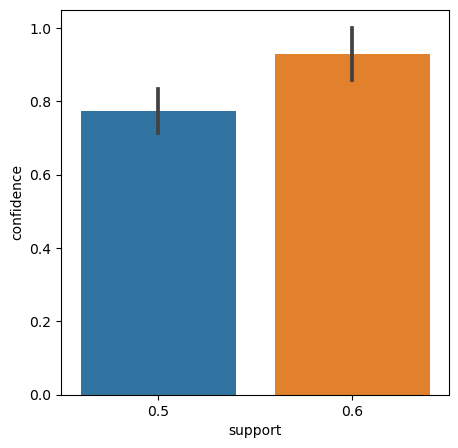

In [75]:
plt.figure(figsize=(5,5))
sns.barplot(x='support',y='confidence',data=lift4)

Text(0.5, 1.0, 'Lift vs Confidence')

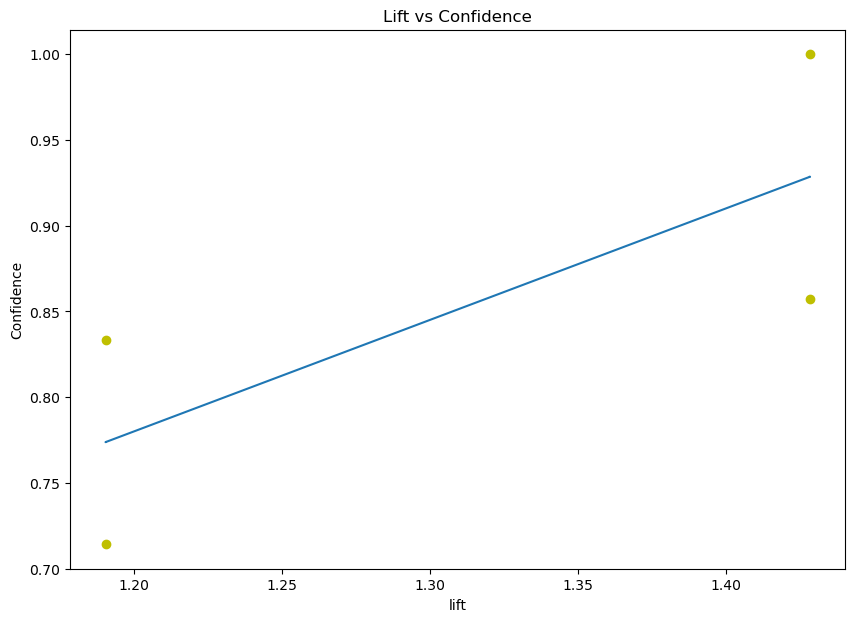

In [76]:
plt.figure(figsize=(10,7))
fit = np.polyfit(rules4['lift'], rules4['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules4['lift'], rules4['confidence'], 'yo', rules4['lift'], 
fit_fn(rules4['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')